# Ebay Car Listing Project

 This project aims to analyze the dataset of cars sold on eBay in Germany, specifically the auto.csv file. Throughout the analysis, the following insights will be obtained:

* Determining the most frequently occurring car brand on the website.
* Identifying the popular car models associated with each brand.
* Analyzing and determining the most common car types found in the dataset.

By conducting this analysis, valuable information the popular car sales trends, their respective models, and the prevalent car types will be derived from the eBay Germany car sales data.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
autos = pd.read_csv('autos.csv', encoding='Latin-1')

#### Now to display the dataframe that is in the csv file.

In [140]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


I'd like to get more information, so I'll use the `df.info()` method. This will give us a better understanding of the columns and datatypes we are working with. 

In [141]:
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Data Cleaning Part 1

The column headers are illustrated poorly. We have random capitilization of letters and no spacing in between words. I will clean the data by  mapping all of the the original columns to the clean columns in a dictionary called `column_dict`. 

In [142]:
column_dict = {'yearOfRegistration': 'registration_year',
'monthOfRegistration': 'registration_month',
'notRepairedDamage': 'unrepaired_damage',
'dateCreated': 'ad_created', 
'nrOfPictures': 'nr_pictures',
'postalCode': 'postal_code',
'lastSeen': 'last_seen',
'dateCrawled': 'date_crawled',
'powerPS': 'power_ps',
'fuelType': 'fuel_type',
'vehicleType': 'vehicle_type',
'gearbox': 'gear_box',
'offerType': 'offer_type'}

Okay, now that we have matched up the columns, it's time to update the dataframe to the clean column names. 
Ill do this by:
1. Using the `.rename()` method with three parameters
  - The first parameter will be the dictionary we made above
  - The second parameter is axis=1 to indicate that we want to do this to just the columns
  - The third parameter inplace=True to replace the orignal column names without making a new array. 

In [143]:
autos.rename(column_dict, axis=1, inplace=True)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now I'm going to convert the price and odometer columns to integer dtypes. There are some characters in the two series that need to be removed before changing the datatype from `string` to `int`.

**Characters that will be removing in the odometer column:**
1. The *km* at the end of each value will be removed because it's a string value.
2. The comma(,) in between the numbers will be removed because it is a string value.

**Characters that will be removed from the price column:**
1. The dollar sign will be removed because it's a string value.
2. The comma(,) in between the numbers will be removed because it is a string value.

In [144]:
autos['odometer'] = autos['odometer'].str.replace('km', '').str.replace(',', '').astype(int)
autos['price'] = autos['price'].str.replace('$', '').str.replace(',', '').astype(int)

autos[['odometer','price']].head()

,odometer,price
0,150000,5000
1,150000,8500
2,70000,8990
3,70000,4350
4,150000,1350


**It would be a good move to put the unit of measure in the *odometer column* header now that we have gotten rid of the 'KM' after every number in the `odometer` series**.

In [145]:
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

Okay now lets get a look at the frequency of the values in odoemter and price columns. I'd like to see if there are any outliers we can get rid of. 

In [146]:
autos['odometer_km'].unique().shape
autos['odometer_km'].describe()
autos['odometer_km'].value_counts().head(10).sort_index(ascending=False)

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
40000       819
5000        967
Name: odometer_km, dtype: int64

So cars that have 150,000 miles on it has a frequency of 32,424. Having a frequency that high for one value can mess up our statistical inferences. 

Now lets look at the *price column*.

In [147]:
autos['price'].unique().shape
autos['price'].value_counts().head(20).sort_index(ascending=False)

4500     394
3500     498
2500     643
2200     382
2000     460
1500     734
1200     639
1000     639
999      434
950      379
900      420
850      410
800      498
750      433
700      395
650      419
600      531
500      781
300      384
0       1421
Name: price, dtype: int64

In [148]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

After looking at the price column we can see that the value 0 has a frequency of 1421. The value of zero definitely needs to go because it's messing up the data. 

I will be getting rid of the values outside of 1,000 and 125,000 to get a more accurate representation of the data in the *odometer column*

In [149]:
autos = autos.loc[autos['odometer_km'].between(1000, 125000)]


**Now to display our changes.**

In [150]:
autos['odometer_km'].unique().shape
autos['odometer_km'].value_counts().head(10).sort_index(ascending=False)

125000    5170
100000    2169
90000     1757
80000     1436
70000     1230
60000     1164
50000     1027
40000      819
30000      789
5000       967
Name: odometer_km, dtype: int64

So there's no more 150,000 

In [151]:
autos['odometer_km'].describe()

count     17576.000000
mean      80964.667729
std       38349.570563
min        5000.000000
25%       50000.000000
50%       90000.000000
75%      125000.000000
max      125000.000000
Name: odometer_km, dtype: float64

Now let's go ahead and get rid of the outlier values in the `price` series. This will help give a more accurate representation of the series to analyze. 

In [152]:
autos = autos.loc[autos['price'].between(1, 20000)]

In [153]:
autos['price'].unique().shape
autos['price'].value_counts().head(10).sort_index(ascending=False)

10500    107
8500     111
6500     119
5500     113
5000     106
4500     128
3500     159
2500     170
1500     129
500      139
Name: price, dtype: int64

In [154]:
autos['price'].describe()

count    15153.000000
mean      6714.406652
std       5260.458163
min          1.000000
25%       2300.000000
50%       5500.000000
75%       9999.000000
max      20000.000000
Name: price, dtype: float64

### Next, I'd like to get the distribution of the dates in the in the *date_crawled*, *ad_created*, and *last_seen* columns

**These are the steps I'm taking to get the distribution of the dates**

1. I collected the first 10 characters in the date for this, because I only want the distrubution for the dates. 
2. After that I used the `series.sort_index()` method to show the each date distribution in descending order. 
3. After that i just multiply the distribution by 100 to get the percentage. 


In [155]:
date_crawled_10 = autos['date_crawled'].str[:10]
date_crawled_dist = date_crawled_10.value_counts(normalize=True, dropna=False).sort_index(ascending=False)*100
autos['date_crawled'] = date_crawled_10

date_crawled_dist.head()

2016-04-07    0.178183
2016-04-06    0.224378
2016-04-05    1.181284
2016-04-04    3.359071
2016-04-03    4.071801
Name: date_crawled, dtype: float64

In [156]:
ad_created_10 = autos['ad_created'].str[:10]
ad_created_dist = ad_created_10.value_counts(normalize=True, dropna=False).sort_index(ascending=False)*100
autos['ad_created'] = ad_created_10

ad_created_dist.head()

2016-04-07    0.164984
2016-04-06    0.237577
2016-04-05    1.115291
2016-04-04    3.339273
2016-04-03    4.078400
Name: ad_created, dtype: float64

In [157]:
last_seen_10 = autos['last_seen'].str[:10]
last_seen_dist = last_seen_10.value_counts(normalize=True, dropna=False).sort_index(ascending=False)*100
autos['last_seen'] = last_seen_10

last_seen_dist.head()


2016-04-07    14.366792
2016-04-06    23.988649
2016-04-05    13.343892
2016-04-04     2.276777
2016-04-03     2.421963
Name: last_seen, dtype: float64

In [158]:
autos['registration_year'].describe()

count    15153.000000
mean      2008.653996
std        143.741304
min       1000.000000
25%       2002.000000
50%       2007.000000
75%       2010.000000
max       9999.000000
Name: registration_year, dtype: float64

Okay so it looks like we have we have some values that don't belong in the **registration year** column. I say this because the max year shouldn't be anywhere near 9999. Same goes for the minimum because cars didn't start coming around until the early 1900's. 

Next, I'll go into the make a boolean array filled with all of the values inside of 1900 to 2016.

In [159]:
autos = autos.loc[autos['registration_year'].between(1900,2016)]


In [160]:
autos['registration_year'].value_counts(normalize=True).sort_index(ascending=False).head(10)

2016    0.017930
2015    0.010539
2014    0.022653
2013    0.033055
2012    0.060430
2011    0.073296
2010    0.069190
2009    0.089105
2008    0.073296
2007    0.059814
Name: registration_year, dtype: float64

In [161]:
autos['registration_year'].describe()

count    14612.000000
mean      2004.817410
std          8.284421
min       1910.000000
25%       2002.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: registration_year, dtype: float64

The data looks to be more accurate now that the years line up with reality. 

In [162]:
autos.head(10)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15
12,2016-03-31,Smart_smart_fortwo_coupe_softouch_pure_MHD_Pan...,privat,Angebot,5299,control,kleinwagen,2010,automatik,71,fortwo,50000,9,benzin,smart,nein,2016-03-31,0,34590,2016-04-06
15,2016-04-01,Corvette_C3_Coupe_T_Top_Crossfire_Injection,privat,Angebot,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,nein,2016-04-01,0,61276,2016-04-02
26,2016-04-03,Volkswagen_Polo_Fox,privat,Angebot,777,control,kleinwagen,1992,manuell,54,polo,125000,2,benzin,volkswagen,nein,2016-04-03,0,38110,2016-04-05
37,2016-03-23,Seat_Altea_XL_2.0_TDI_CR_DPF_Style,privat,Angebot,13800,test,bus,2012,manuell,140,altea,90000,2,diesel,seat,nein,2016-03-23,0,85113,2016-04-05
38,2016-03-21,Volkswagen_Golf_1.4_Special,privat,Angebot,2850,control,limousine,2002,manuell,75,golf,125000,2,benzin,volkswagen,nein,2016-03-21,0,63674,2016-03-28
42,2016-03-22,Vw_Polo_l.0_/60_PS_Blue_Motion_Technologie_Son...,privat,Angebot,11900,control,kleinwagen,2014,manuell,60,polo,20000,7,benzin,volkswagen,NaN,2016-03-22,0,26629,2016-04-06
43,2016-03-08,Audi_A1_1.2_TFSI_Attraction_mit_Garantie,privat,Angebot,11500,test,kleinwagen,2011,manuell,86,a1,60000,9,benzin,audi,nein,2016-03-08,0,85049,2016-04-07
50,2016-03-09,??_????????_??Top!!!_Peugeot_308_sw_Sport_?...,privat,Angebot,5999,test,kombi,2008,manuell,150,3_reihe,125000,8,benzin,peugeot,nein,2016-03-09,0,55569,2016-04-07


In [163]:
selected_brand_values = autos['brand'].value_counts(normalize=True)*100

new_brand_values = selected_brand_values[selected_brand_values > 5]
new_brand_values.index = new_brand_values.index

print(new_brand_values)




volkswagen       18.252122
opel             10.874624
ford              8.130304
bmw               6.973720
mercedes_benz     6.241445
renault           5.214892
audi              5.057487
Name: brand, dtype: float64


In [164]:
selected_brand_values_2 = autos['brand'].value_counts(normalize=True)*100

brand_names = selected_brand_values_2[selected_brand_values_2 > 5].index

print(brand_names)

Index(['volkswagen', 'opel', 'ford', 'bmw', 'mercedes_benz', 'renault',
       'audi'],
      dtype='object')


I selected the first 22 brands because they all have a distribution rate over 5%. The last brand that makes the cut is audi as can be seen above. This was done to better understand the brand column without having to look into every single brand. Now the objective is to get the mean price for these car brands. 

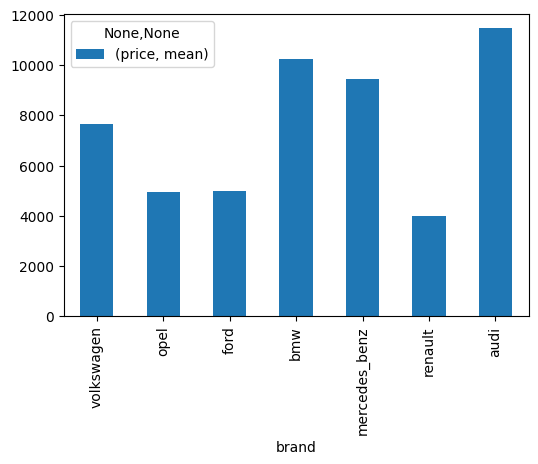

In [165]:
grouped_multiple = autos.groupby(['brand']).agg({'price':['mean']})
grouped_multiple = grouped_multiple.sort_values(('price','mean'), ascending=False)

grouped_multiple = grouped_multiple.filter(items=brand_names, axis=0) #This is done to display the car brands we want
round(grouped_multiple, 2)
grouped_multiple.plot.bar()

In [166]:
grouped_multiple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, volkswagen to audi
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (price, mean)  7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


In [167]:
grouped_kilometer = autos.groupby(['brand']).agg({'odometer_km':['mean']})
grouped_kilometer = grouped_kilometer.sort_values(('odometer_km', 'mean'), ascending=False)
grouped_kilometer
grouped_kilometer = grouped_kilometer.filter(items=brand_names, axis=0) # This is done to display 
                                                                        # the car brands we want.
grouped_kilometer

,odometer_km
,mean
brand,
volkswagen,83781.402325
opel,86831.340466
ford,84856.902357
bmw,90618.253189
mercedes_benz,89671.052632
renault,87723.097113
audi,88058.186739


Okay so now we are going to combine these two dataframes to make one dataframe

In [168]:
price_km_merged = grouped_kilometer.merge(grouped_multiple, on='brand')
round(price_km_merged, 2)

,odometer_km,price
,mean,mean
brand,,
volkswagen,83781.40,7668.96
opel,86831.34,4938.35
ford,84856.90,5001.76
bmw,90618.25,10238.80
mercedes_benz,89671.05,9446.34
renault,87723.10,3989.66
audi,88058.19,11460.40


In [169]:
price_km_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, volkswagen to audi
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (odometer_km, mean)  7 non-null      float64
 1   (price, mean)        7 non-null      float64
dtypes: float64(2)
memory usage: 168.0+ bytes


Remember that these *car brands* are still in descending order based on distribution rate. The cheapest car in the `price_km_merged` is french automobile company, **renault**. They do have one of the highest *mileage means* on the list sitting at 87,723 kilometers. 
I cannot say that this is a result of their good reliabilty because the the cars with the highest mileage in this dataset are luxury cars like **audi** and **mercedes_benz**. Those same luxury cars are known for their unreliability when their mileage gets higher. They also have the highest prices in the data set as well. 
I can see why **volkswagon** has the most distribution in the `brand series`. It averages lower price and mileage than it's competition. Other economy brands such as **opel** and **ford** are right behind **volkswagon** in terms of distribution rate for the same reasons. 

## Cleaning the Data Part 2

It seems like we still have some German words as variables in the dataset. I'll be changing those variables to their english translations using a `nested dictionary`. 

In [170]:
autos.head(12)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
2,2016-03-26,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15
12,2016-03-31,Smart_smart_fortwo_coupe_softouch_pure_MHD_Pan...,privat,Angebot,5299,control,kleinwagen,2010,automatik,71,fortwo,50000,9,benzin,smart,nein,2016-03-31,0,34590,2016-04-06
15,2016-04-01,Corvette_C3_Coupe_T_Top_Crossfire_Injection,privat,Angebot,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,nein,2016-04-01,0,61276,2016-04-02
26,2016-04-03,Volkswagen_Polo_Fox,privat,Angebot,777,control,kleinwagen,1992,manuell,54,polo,125000,2,benzin,volkswagen,nein,2016-04-03,0,38110,2016-04-05
37,2016-03-23,Seat_Altea_XL_2.0_TDI_CR_DPF_Style,privat,Angebot,13800,test,bus,2012,manuell,140,altea,90000,2,diesel,seat,nein,2016-03-23,0,85113,2016-04-05
38,2016-03-21,Volkswagen_Golf_1.4_Special,privat,Angebot,2850,control,limousine,2002,manuell,75,golf,125000,2,benzin,volkswagen,nein,2016-03-21,0,63674,2016-03-28
42,2016-03-22,Vw_Polo_l.0_/60_PS_Blue_Motion_Technologie_Son...,privat,Angebot,11900,control,kleinwagen,2014,manuell,60,polo,20000,7,benzin,volkswagen,NaN,2016-03-22,0,26629,2016-04-06
43,2016-03-08,Audi_A1_1.2_TFSI_Attraction_mit_Garantie,privat,Angebot,11500,test,kleinwagen,2011,manuell,86,a1,60000,9,benzin,audi,nein,2016-03-08,0,85049,2016-04-07
50,2016-03-09,??_????????_??Top!!!_Peugeot_308_sw_Sport_?...,privat,Angebot,5999,test,kombi,2008,manuell,150,3_reihe,125000,8,benzin,peugeot,nein,2016-03-09,0,55569,2016-04-07


In [171]:
translation_dictionary = {
    'unrepaired_damage':{'nein': 'no', 'ja': 'yes'},
    'fuel_type':{'benzin': 'gasoline'},
    'vehicle_type': {'kleinwagen': 'small_car', 'kombi': 'station_wagon', 'carbrio': 'convertable'},
    'gear_box': {'automatik': 'automatic', 'manuell': 'manuel'},
    'seller': {'privat': 'private'},
    'offer_type': {'Angebot': 'bid'},
    'brand': {'sonstige_autos': 'other_cars'}
                          }


In [172]:
for language, mapping in translation_dictionary.items():
    autos[language] = autos[language].replace(mapping)

Now we are going to take the dashes out of the columns with dates. 

In [173]:
autos.head(15)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
2,2016-03-26,Volkswagen_Golf_1.6_United,private,bid,8990,test,limousine,2009,manuel,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26,0,35394,2016-04-06
3,2016-03-12,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,bid,4350,control,small_car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12,0,33729,2016-03-15
12,2016-03-31,Smart_smart_fortwo_coupe_softouch_pure_MHD_Pan...,private,bid,5299,control,small_car,2010,automatic,71,fortwo,50000,9,gasoline,smart,no,2016-03-31,0,34590,2016-04-06
15,2016-04-01,Corvette_C3_Coupe_T_Top_Crossfire_Injection,private,bid,18900,test,coupe,1982,automatic,203,NaN,80000,6,gasoline,other_cars,no,2016-04-01,0,61276,2016-04-02
26,2016-04-03,Volkswagen_Polo_Fox,private,bid,777,control,small_car,1992,manuel,54,polo,125000,2,gasoline,volkswagen,no,2016-04-03,0,38110,2016-04-05
37,2016-03-23,Seat_Altea_XL_2.0_TDI_CR_DPF_Style,private,bid,13800,test,bus,2012,manuel,140,altea,90000,2,diesel,seat,no,2016-03-23,0,85113,2016-04-05
38,2016-03-21,Volkswagen_Golf_1.4_Special,private,bid,2850,control,limousine,2002,manuel,75,golf,125000,2,gasoline,volkswagen,no,2016-03-21,0,63674,2016-03-28
42,2016-03-22,Vw_Polo_l.0_/60_PS_Blue_Motion_Technologie_Son...,private,bid,11900,control,small_car,2014,manuel,60,polo,20000,7,gasoline,volkswagen,NaN,2016-03-22,0,26629,2016-04-06
43,2016-03-08,Audi_A1_1.2_TFSI_Attraction_mit_Garantie,private,bid,11500,test,small_car,2011,manuel,86,a1,60000,9,gasoline,audi,no,2016-03-08,0,85049,2016-04-07
50,2016-03-09,??_????????_??Top!!!_Peugeot_308_sw_Sport_?...,private,bid,5999,test,station_wagon,2008,manuel,150,3_reihe,125000,8,gasoline,peugeot,no,2016-03-09,0,55569,2016-04-07


In [174]:
autos['date_crawled'] = autos['date_crawled'].str.replace('-', '').astype(int)
autos['ad_created'] = autos['ad_created'].str.replace('-', '').astype(int)
autos['last_seen'] = autos['last_seen'].str.replace('-', '').astype(int)

In [175]:
autos.head(2)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
2,20160326,Volkswagen_Golf_1.6_United,private,bid,8990,test,limousine,2009,manuel,102,golf,70000,7,gasoline,volkswagen,no,20160326,0,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,bid,4350,control,small_car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,20160312,0,33729,20160315


I noticed that the corvette has a NaN value in the `model` column. It also has the element other_cars in brand. I will use the corvette key word in the `name` column to assign word "corvette" to the model column and "chevy" to the `brand` column.

In [176]:
original_name = autos['name']  #Going to need this to bring it back
autos['name'] = autos['name'].str.split('_').str[0]
autos.loc[autos['name'] == 'Corvette', 'model'] = 'corvette'
autos.loc[autos['name'] == 'Corvette', 'brand'] = 'chevy'



In [177]:
autos['name'] = original_name

In [178]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gear_box,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_pictures,postal_code,last_seen
2,20160326,Volkswagen,private,bid,8990,test,limousine,2009,manuel,102,golf,70000,7,gasoline,volkswagen,no,20160326,0,35394,20160406
3,20160312,Smart,private,bid,4350,control,small_car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,20160312,0,33729,20160315
12,20160331,Smart,private,bid,5299,control,small_car,2010,automatic,71,fortwo,50000,9,gasoline,smart,no,20160331,0,34590,20160406
15,20160401,Corvette,private,bid,18900,test,coupe,1982,automatic,203,corvette,80000,6,gasoline,chevy,no,20160401,0,61276,20160402
26,20160403,Volkswagen,private,bid,777,control,small_car,1992,manuel,54,polo,125000,2,gasoline,volkswagen,no,20160403,0,38110,20160405


## Data Analysis Part 2 

Okay now I'm curious to see which combination between brand and model comes up the most in the autos 

In [179]:
autos.groupby(['brand', 'model']).size().sort_values(ascending=False)

brand       model   
volkswagen  golf        1049
opel        corsa        573
volkswagen  polo         560
bmw         3er          435
smart       fortwo       433
                        ... 
saab        9000           1
smart       andere         1
subaru      forester       1
volvo       850            1
land_rover  andere         1
Length: 277, dtype: int64

 The golf is volkswagen's best selling model. 

Now i would like to see how much cheaper damaged cars are when compared to non_damaged cars. 

In [180]:
damaged_or_not = autos.groupby(['unrepaired_damage']).agg({'price': ['mean']})
round(damaged_or_not, 2)

,price
,mean
unrepaired_damage,
no,7611.41
yes,2995.69


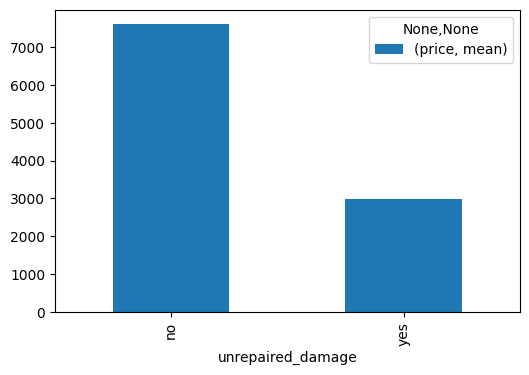

In [181]:
damaged_or_not.plot.bar()

In [182]:
difference_between_yes_no = 7611.41 - 2995.69
round(difference_between_yes_no, 2)

4615.72

The average difference between cars that have been repaired and cars that haven't is $4,615.72

## Conlcusion

I cleaned the data so that the dataset was easier to analyze and understand. This was the first time I analyzed data using aggregation with pandas. It took me a while to get to the right resources but it was worth it. Using things like groupby(), nested_dictionaries, agg() all proved very useful when it came to both manipulating and analyzing the data.

**Insights**

The data shows that there is a significant amount of volkswagons being purchased in Germany. This can be because it is known to be a well priced, reliable native car with less miles on average than their competitors. The Golf seems to be the most bought car model which makes sense because it's a hatchback and they are known to be more popular in Europe. And ofcourse there's a significant difference in pricing when it comes to damaged and non-damaged cars. With the non-damaged being significantly more expesive. 